# Project 4 - Flights Database Analysis Using Pandas

## Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1

# Loading Datasets

In [2]:
airlines = pd.read_csv(r'Path.csv')

In [3]:
airports = pd.read_csv(r'Path.csv')

In [4]:
flights = pd.read_csv(r'Path.csv')

## Code to show all columns

In [5]:
pd.set_option('max_columns', None)

# Datasets Presentation

In [6]:
airlines.head(3)

,iata_code,airline
0,AA,American Airlines Inc.
1,AS,Alaska Airlines Inc.
2,B6,JetBlue Airways


In [7]:
flights.head(3)

,flight_id,flight_date,airline,flight_number,origin_airport,destination_airport,delay_in_minutes,cancelled,cancel_reason
0,1,2015-04-04,AS,98,ANC,SEA,976,0,NaN
1,2,2015-03-11,AA,2336,LAX,PBI,711,0,NaN
2,3,2015-07-14,US,840,SFO,CLT,937,0,NaN


In [8]:
airports.head(3)

,iata_code,airport,city,state,country,latitude,longituge
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40,-75
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32,-99
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35,-106


# 2

## how many airelines are listed in this database?

In [9]:
number_of_airlines = airlines['airline'].count()

print('The number of airlines in the database is:',number_of_airlines)

The number of airlines in the database is: 14


# 2.1

## which state has the highest amount of airports?

In [10]:
airports.groupby('state')['airport'].count()\
.to_frame().rename(columns = {'airport':'number_of_airports'}).sort_values('number_of_airports',ascending=False).head(1)

,number_of_airports
state,
TX,24


# 2.2

## visualize the number of airports in each state

Step 1: creating a table (called 'data')

In [11]:
data = airports.groupby('state')[['airport']].count()\
.sort_values('airport',ascending=False).rename(columns = {'airport':'number_of_airports'})

Step 2: creating a graph based on the data

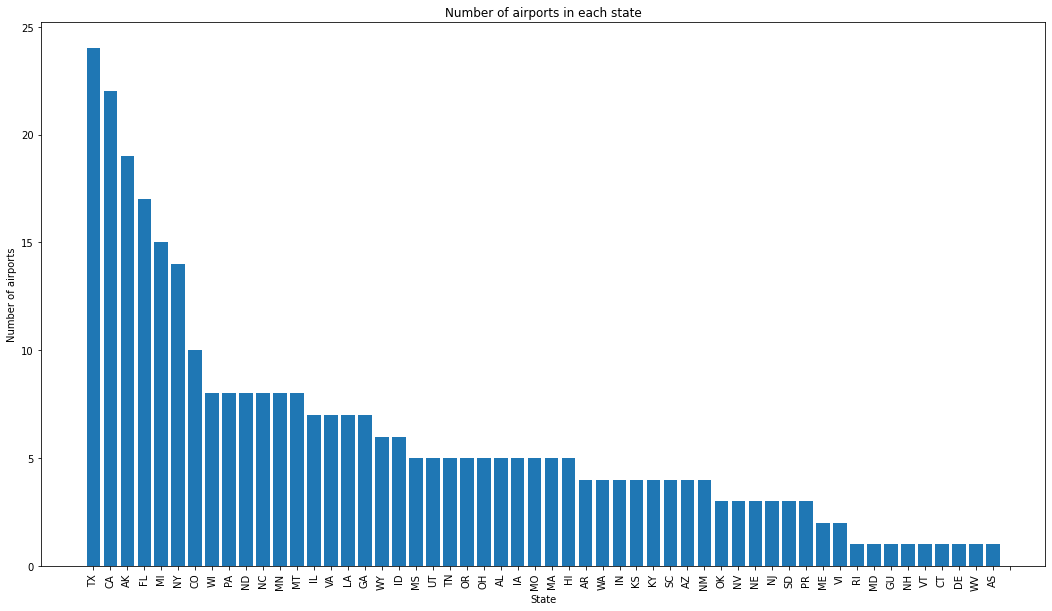

In [12]:
x_axis = data.index
y_axis = data['number_of_airports']
plt.figure(figsize = (18,10)) 
plt.xticks(rotation=90) 
plt.bar(x_axis, y_axis)
plt.xlabel('State') 
plt.ylabel('Number of airports') 
plt.title('Number of airports in each state')
plt.xticks(np.arange(0,len(data)+1)) 
plt.show()

# 3.1

## what was the most common reason for flight cancellation?

In [13]:
flights.groupby('cancel_reason')['flight_id'].count()\
.to_frame().sort_values('flight_id',ascending=False).rename(columns = {'flight_id':'number_of_cancels'}).head(1)

,number_of_cancels
cancel_reason,
Security,456


# 3.2

## visualize the number of cancellations for each reason

Step 1: creating a table (called 'data2')

In [14]:
data2 = flights.groupby('cancel_reason')['flight_id'].count()\
.to_frame().sort_values('flight_id',ascending=False).rename(columns = {'flight_id':'number_of_cancels'})

Step 2: creating a graph based on the data

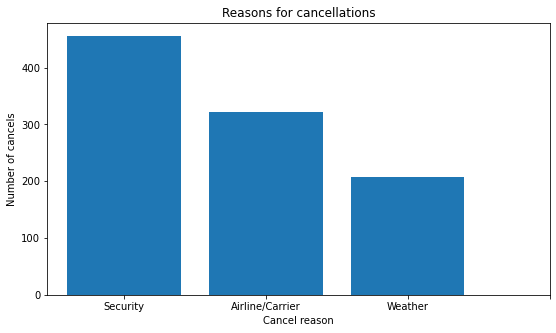

In [15]:
x_axis2 = data2.index
y_axis2 = data2['number_of_cancels']
plt.figure(figsize = (9,5)) 
plt.xticks(rotation=0) 
plt.bar(x_axis2, y_axis2)
plt.xlabel('Cancel reason') 
plt.ylabel('Number of cancels') 
plt.title('Reasons for cancellations')
plt.xticks(np.arange(0,len(data2)+1)) 
plt.show()

# 5.1

## how many flights have benn carried by each airline

In [16]:
flights.groupby('airline')['flight_id'].count()\
.to_frame().sort_values('flight_id',ascending=False).rename(columns = {'flight_id':'number_of_flights'})

,number_of_flights
airline,
WN,815
DL,633
OO,572
AA,549
UA,504
EV,427
US,343
MQ,324
B6,301


# 5.2 

## visualize the result (number of flights each airline)

Step 1: creating a table (called 'data3')

In [17]:
data3 = flights.groupby('airline')['flight_id'].count()\
.to_frame().sort_values('flight_id',ascending=False).rename(columns = {'flight_id':'number_of_flights'})

Step 2: creating a graph based on the data

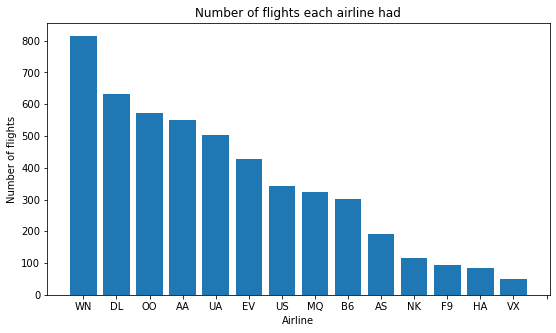

In [18]:
x_axis3 = data3.index
y_axis3 = data3['number_of_flights']
plt.figure(figsize = (9,5)) 
plt.xticks(rotation=0) 
plt.bar(x_axis3, y_axis3)
plt.xlabel('Airline') 
plt.ylabel('Number of flights') 
plt.title('Number of flights each airline had')
plt.xticks(np.arange(0,len(data3)+1)) 
plt.show()

# 6.1

## which company had the highest amount of delays (in minutes)

In [19]:
flights.groupby('airline')['delay_in_minutes'].sum()\
.to_frame().sort_values('delay_in_minutes',ascending=False).rename(columns = {'delay_in_minutes':'total_delay_in_minutes'}).head(1)

,total_delay_in_minutes
airline,
WN,407462


# 6.2

## visualize the amount of delays for each airline

Step 1: Merge (Join) between airlines table and flights table

In [20]:
airlines_flights = airlines.merge(flights,
                                  how = 'inner',
                                  left_on = 'iata_code',
                                  right_on = 'airline')

Step 2: changing column names back to their original name

In [21]:
airlines_flights = airlines_flights.rename(columns = {'airline_x':'airline'})

Step 3: removing duplicate columns

In [22]:
airlines_flights.drop('airline_y',axis = 1,inplace=True)

Step 4: creating a table (called 'data4')

In [23]:
data4 = airlines_flights.groupby('airline')['delay_in_minutes'].sum()\
.to_frame().sort_values('delay_in_minutes',ascending=False).rename(columns = {'delay_in_minutes':'total_delay_in_minutes'})

Step 5: creating a graph based on the data

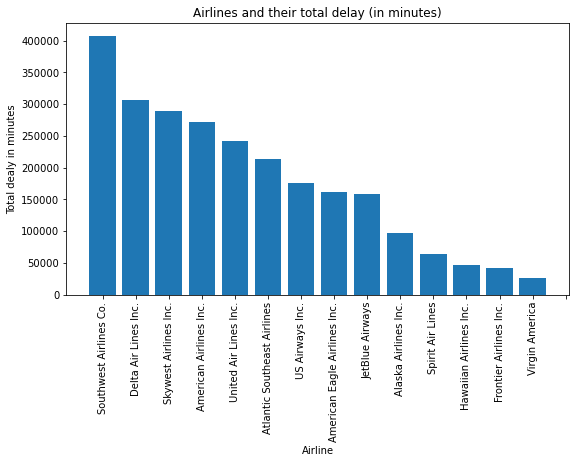

In [24]:
x_axis4 = data4.index
y_axis4 = data4['total_delay_in_minutes']
plt.figure(figsize = (9,5)) 
plt.xticks(rotation=90) 
plt.bar(x_axis4, y_axis4)
plt.xlabel('Airline') 
plt.ylabel('Total dealy in minutes') 
plt.title('Airlines and their total delay (in minutes)')
plt.xticks(np.arange(0,len(data4)+1)) 
plt.show()

# 7.1

## a customer is planning to take a flight from LAX to SFO, bases on the data you have regarding delays, which airline will you recommend him to take?

Step 1: creating filter variables and using the filter variables to create a new table with only the relevant data for the task

In [25]:
lax_origin = airlines_flights['origin_airport'] == 'LAX'
sfo_destination = airlines_flights['destination_airport'] == 'SFO'

flights_lax_to_sfo = airlines_flights[lax_origin & sfo_destination]

Step 2:

In [26]:
flights_lax_to_sfo.groupby('airline')['delay_in_minutes'].sum()\
.to_frame().sort_values('delay_in_minutes',ascending=True).rename(columns = {'delay_in_minutes':'total_delay_in_minutes'}).head(1)

,total_delay_in_minutes
airline,
Southwest Airlines Co.,511


# 7.2

## visualize the options (the other airlines he can chose from and their delays)

Step 1: creating a table (called 'data5')

In [27]:
data5 = flights_lax_to_sfo.groupby('airline')['delay_in_minutes'].sum()\
.to_frame().sort_values('delay_in_minutes',ascending=True).rename(columns = {'delay_in_minutes':'total_delay_in_minutes'})

Step 2: creating a graph based on the data

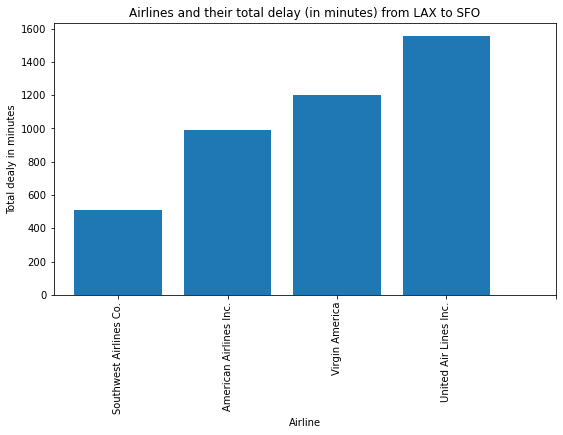

In [28]:
x_axis5 = data5.index
y_axis5 = data5['total_delay_in_minutes']
plt.figure(figsize = (9,5)) 
plt.xticks(rotation=90) 
plt.bar(x_axis5, y_axis5)
plt.xlabel('Airline') 
plt.ylabel('Total dealy in minutes') 
plt.title('Airlines and their total delay (in minutes) from LAX to SFO')
plt.xticks(np.arange(0,len(data5)+1)) 
plt.show()

# 8

## based on the data you have if customer is planning to take a flight what are the odds it will be cancelled?

Step 1: creating a variable that hold the total number of flights 

In [29]:
number_of_flights_taken = airlines_flights['flight_id'].count()

Step 2: creating a filter variable that will show cancelled flights only and creating a variable that will hold the total number of cancelled flights 

In [30]:
all_flights_canceled = airlines_flights['cancelled']>=1

number_of_flights_canceld = airlines_flights[all_flights_canceled]['flight_id'].count()

Step 3: creating a variable that will hold the number of flights total divide by the number of cancelled flights total

In [31]:
odds_for_canceled_flight = number_of_flights_canceld/number_of_flights_taken

print ('The odds your flight will be canceled are:',odds_for_canceled_flight*100,'%')

The odds your flight will be canceled are: 19.7 %


# 9.1

## which aireline company has the highest cancellation rate?

Step 1: creating a table that holds the flight companies names and number of canclled flights each flight company had 

In [32]:
number_of_cancels_by_airline = airlines_flights.groupby('airline')['cancelled'].sum()\
.to_frame().sort_values('cancelled',ascending=False).rename(columns = {'cancelled':'number_of_cancelled_flights'})

Step 2: creating a table that holds the flight companies names and number of flights total each company had

In [33]:
number_of_flights_by_airline = airlines_flights.groupby('airline')['flight_id'].count()\
.to_frame().sort_values('flight_id',ascending=False).rename(columns = {'flight_id':'number_of_flights'})

Step 3: merging (Join) the two tables from step 1 and step 2 to show both canclled flights and total flights made columns

In [34]:
cancel_ratio_table = number_of_flights_by_airline.merge(number_of_cancels_by_airline,
                                                  how = 'inner',
                                                  left_on = 'airline',
                                                  right_on = 'airline')

Step 4: creating a new column in the table that will hold the percentage of canclled flights each flight company had

In [35]:
cancel_ratio_table['cancel_ratio'] = cancel_ratio_table['number_of_cancelled_flights']/cancel_ratio_table['number_of_flights']

Step 5: creating a variable that holds the airline name and the 'cancel_ratio' columns from the table

In [36]:
cancel_ratio = cancel_ratio_table['cancel_ratio']

Step 6: presenting the data and ordering the data in descending order

In [37]:
cancel_ratio.to_frame().sort_values('cancel_ratio',ascending=False)

,cancel_ratio
airline,
Hawaiian Airlines Inc.,0.277108
American Eagle Airlines Inc.,0.219136
Frontier Airlines Inc.,0.215054
Southwest Airlines Co.,0.214724
American Airlines Inc.,0.209472
JetBlue Airways,0.205980
Skywest Airlines Inc.,0.204545
Virgin America,0.200000
United Air Lines Inc.,0.196429


# 9.2

## visualize the result

Step 1: creating a table (called 'data6')

In [38]:
data6 = cancel_ratio.to_frame().sort_values('cancel_ratio',ascending=False)

Step 2: creating a graph based on the data

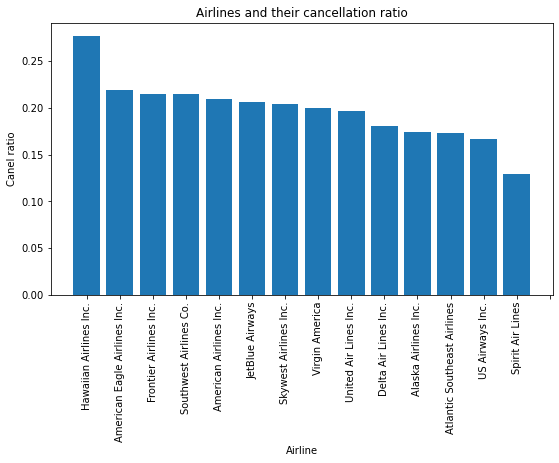

In [39]:
x_axis6 = data6.index
y_axis6 = data6['cancel_ratio']
plt.figure(figsize = (9,5)) 
plt.xticks(rotation=90) 
plt.bar(x_axis6, y_axis6)
plt.xlabel('Airline') 
plt.ylabel('Canel ratio') 
plt.title('Airlines and their cancellation ratio')
plt.xticks(np.arange(0,len(data6)+1)) 
plt.show()

# 10.1 

## which airport had the highest number of cancellations due to security issues?

Step 1: merg (Join) between airports table and flights table

In [40]:
airports_flights = airports.merge(flights,
                                  how = 'inner',
                                  left_on = 'iata_code',
                                  right_on = 'origin_airport')

Step 2: creating a filter variable that holds only relevant (cancel reason = security) and creating a table variable with only relevant data 

In [41]:
security_filter = airports_flights['cancel_reason']=='Security'

airports_flights_cancelled_security = airports_flights[security_filter]

Step 3:

In [42]:
airports_flights_cancelled_security.groupby('airport')['cancelled'].sum()\
.to_frame().sort_values('cancelled',ascending=False).rename(columns = {'cancelled':'cancelled_flights_by_security'}).head(1)

,cancelled_flights_by_security
airport,
Dallas/Fort Worth International Airport,22


# 10.2

## visualize the top-10 airports by cancellations due to security issues

Step 1: creating a table (called 'data7')

In [43]:
data7 = airports_flights_cancelled_security.groupby('airport')['cancelled'].sum()\
.to_frame().sort_values('cancelled',ascending=False).rename(columns = {'cancelled':'cancelled_flights_by_security'}).head(10)

Step 2: creating a graph based on the data

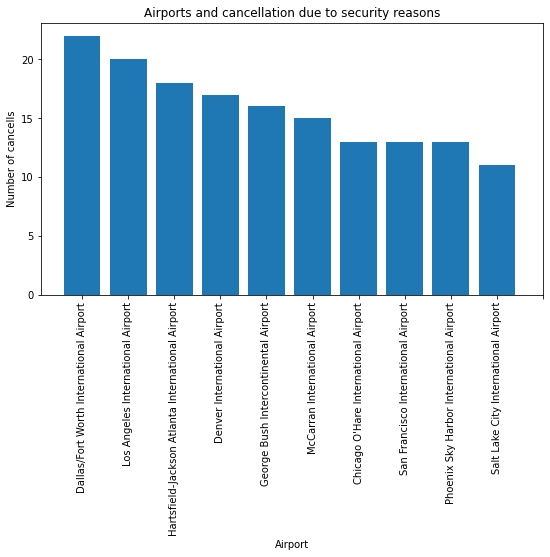

In [44]:
x_axis7 = data7.index
y_axis7 = data7['cancelled_flights_by_security']
plt.figure(figsize = (9,5)) 
plt.xticks(rotation=90) 
plt.bar(x_axis7, y_axis7)
plt.xlabel('Airport') 
plt.ylabel('Number of cancells') 
plt.title('Airports and cancellation due to security reasons')
plt.xticks(np.arange(0,len(data7)+1)) 
plt.show()

# 11.1

## display the number of flights per month

Step 1: creating a new column that holds the month number of the flight date

In [45]:
flights['flight_month'] = flights['flight_date'].dt.month

Step 2:

In [46]:
flights.groupby('flight_month')['flight_id'].count()\
.to_frame().rename(columns = {'flight_id':'number_of_flights'}).sort_values('number_of_flights',ascending=False)

,number_of_flights
flight_month,
10,456
1,447
3,445
7,438
9,436
4,429
8,422
5,413
6,413


# 11.2

## visualize the results

Step 1: creating a table (called 'data8')

In [47]:
data8 = flights.groupby('flight_month')['flight_id'].count()\
.to_frame().rename(columns = {'flight_id':'number_of_flights'}).sort_values('number_of_flights',ascending=False)

Step 2: creating a graph based on the data

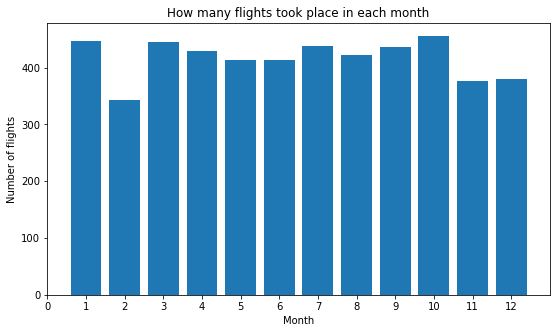

In [48]:
x_axis8 = data8.index
y_axis8 = data8['number_of_flights']
plt.figure(figsize = (9,5)) 
plt.xticks(rotation=0) 
plt.bar(x_axis8, y_axis8)
plt.xlabel('Month') 
plt.ylabel('Number of flights') 
plt.title('How many flights took place in each month')
plt.xticks(np.arange(0,len(data8)+1)) 
plt.show()

# 12

## how many flight carried out by "American Airlines Inc", flew out of "Los Angeles International Airport" to "Miami International Airport"

Step 1: mergin all 3 tables using the already merged table 'airlines_flights' and mergin it with the third table - airports based on origin airports

In [49]:
airlines_flights_airpots1 = airlines_flights.merge(airports,
                                                  how = 'inner',
                                                  left_on = 'origin_airport',
                                                  right_on = 'iata_code')

Step 2: new merged table based on the table from Step 1 merged with airports based on destination_airport

In [50]:
airlines_flights_airpots2 = airlines_flights_airpots1.merge(airports,
                                                  how = 'inner',
                                                  left_on = 'destination_airport',
                                                  right_on = 'iata_code')

Step 3: creating filter variables to filter only the relevant data for the task

In [51]:
aa_airline_filter = airlines_flights_airpots2['airline']=='American Airlines Inc.'
from_la = airlines_flights_airpots2['airport_x'] == 'Los Angeles International Airport'
to_miami = airlines_flights_airpots2['airport_y'] == 'Miami International Airport'

table_la_to_miami = airlines_flights_airpots2[aa_airline_filter&from_la&to_miami]

Step 4:

In [53]:
aa_la_maimi = table_la_to_miami['flight_id'].count()

print ('The number of flights carried by American Airlines Inc from Los Angeles International Airport\
to Miami International Airport are:',aa_la_maimi)

The number of flights carried by American Airlines Inc from Los Angeles International Airportto Miami International Airport are: 4
